In [8]:
import pandas as pd

df = pd.read_csv("data/insurance.csv")




In [9]:
df.charges.corr(df.age)

np.float64(0.29900819333064754)

In [11]:
from scipy import stats

r , p = stats.pearsonr(df.charges , df.age)

print(round(r , 4))
print(round(p , 29))


0.299
5.0000000000000004e-29


In [12]:
corr_df = pd.DataFrame(columns=[r,p])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != "charges":
        r , p = stats.pearsonr(df.charges , df[col])
        corr_df.loc[col] = [round(r , 3) , round(p,3)]
        
corr_df

,2.990082e-01,4.886693e-29
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


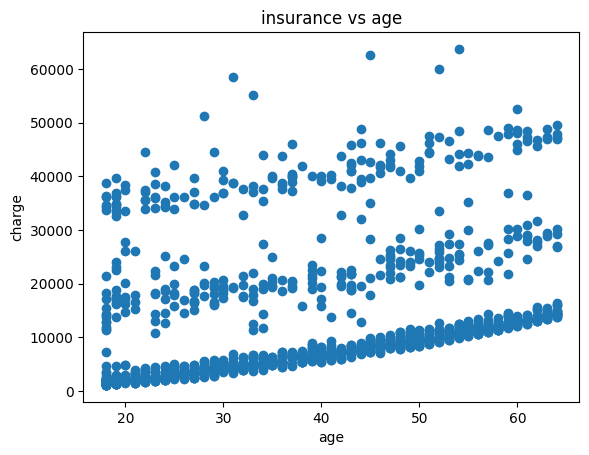

In [13]:
import matplotlib.pyplot as plt


plt.scatter(df.age , df.charges)
plt.title("insurance vs age")
plt.xlabel('age')
plt.ylabel('charge')
plt.show()

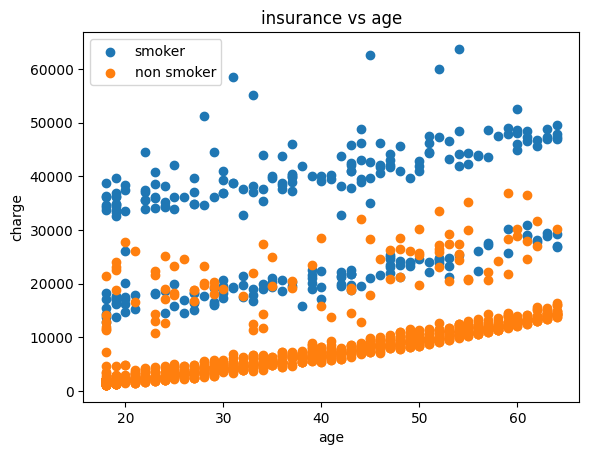

In [14]:
df_smoker = df[df["smoker"]  == 'yes']
df_nonsmoker =df[df["smoker"]  == 'no']


plt.scatter(df_smoker.age , df_smoker.charges , label='smoker')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges , label='non smoker')
plt.title("insurance vs age")
plt.xlabel('age')
plt.ylabel('charge')
plt.legend()
plt.show()

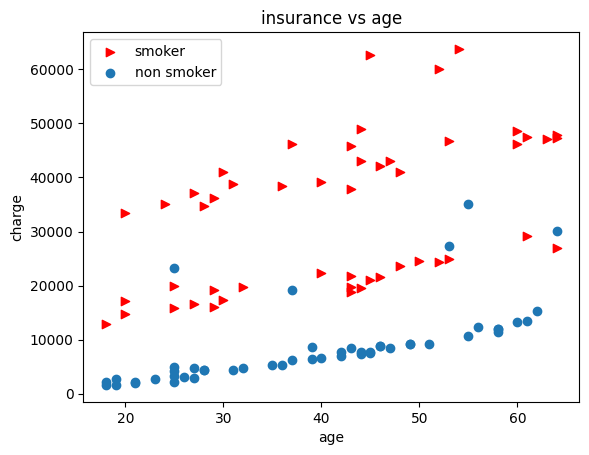

In [15]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)


plt.scatter(df_smoker_reduced.age , df_smoker_reduced.charges , label='smoker' , color= 'Red' , marker= '>')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges , label='non smoker')
plt.title("insurance vs age")
plt.xlabel('age')
plt.ylabel('charge')
plt.legend()
plt.show()

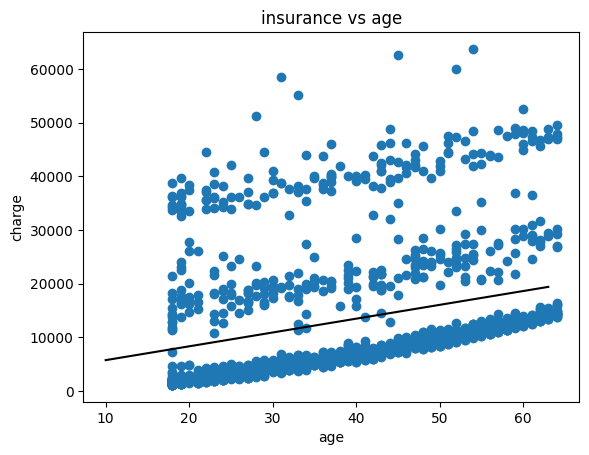

In [19]:


# Y = mx + b
# y = slope(x) + intersect

m , b ,  r , p , err = stats.linregress(df.age , df.charges)

x = range(10, df.age.max())

y = m * x +b

plt.plot(x , y , color = "black")


plt.scatter(df.age , df.charges)
plt.title("insurance vs age")
plt.xlabel('age')
plt.ylabel('charge')
plt.show()



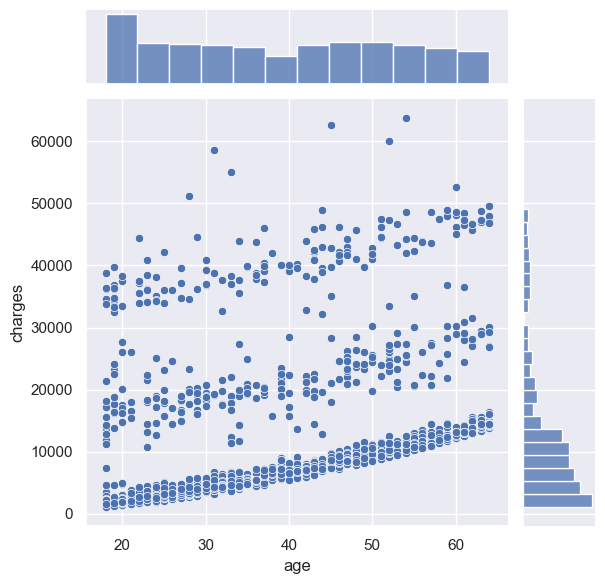

In [21]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x= "age" , y = "charges" , data = df)
plt.show()

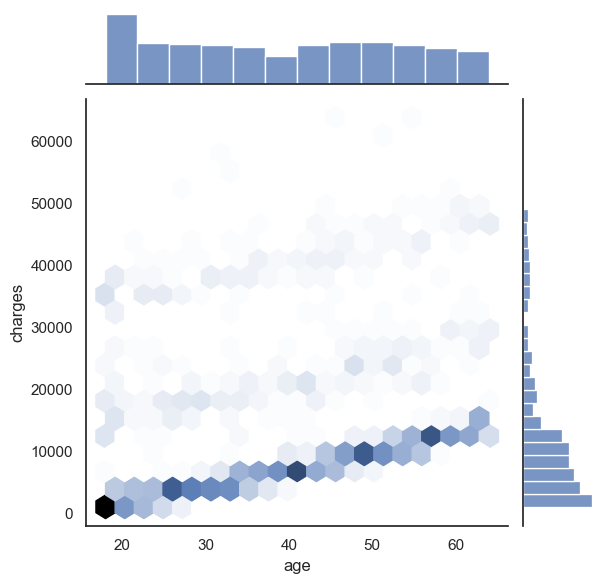

In [25]:
sns.set_style("white")
sns.jointplot(x= "age" , y = "charges" , data = df , kind= "hex")

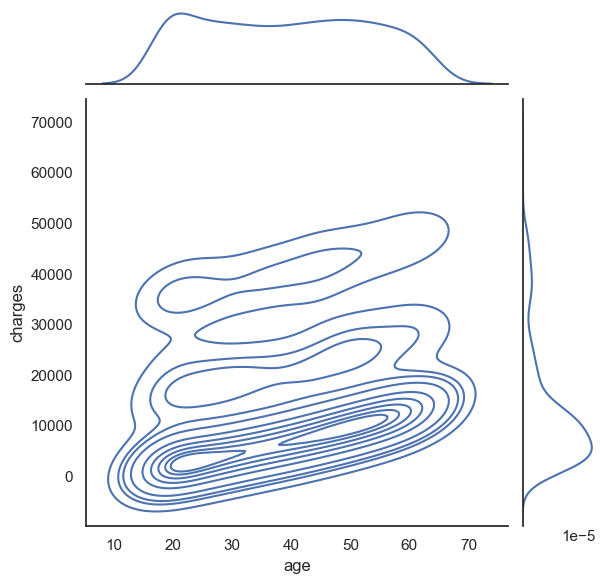

In [26]:
sns.jointplot(x= "age" , y = "charges" , data = df , kind= "kde")


/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_3163/3466367169.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.age, y=df.charges, cmap=cmap, n_levels=60, shade=True, ax=ax)


<Axes: xlabel='age', ylabel='charges'>

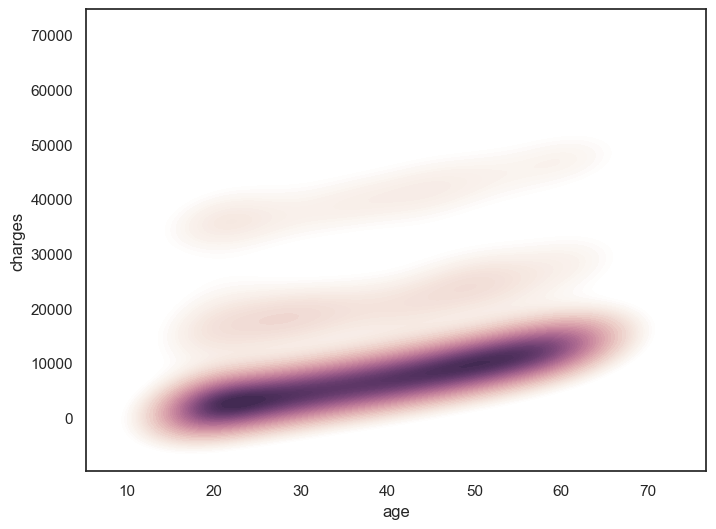

In [30]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Create subplots
f, ax = plt.subplots(figsize=(8, 6))

# Define the colormap (ensure correct values for dark and light)
cmap = sns.cubehelix_palette(as_cmap=True, dark=0.2, light=1, reverse=False)

# KDE plot with the given data
sns.kdeplot(x=df.age, y=df.charges, cmap=cmap, n_levels=60, shade=True, ax=ax)

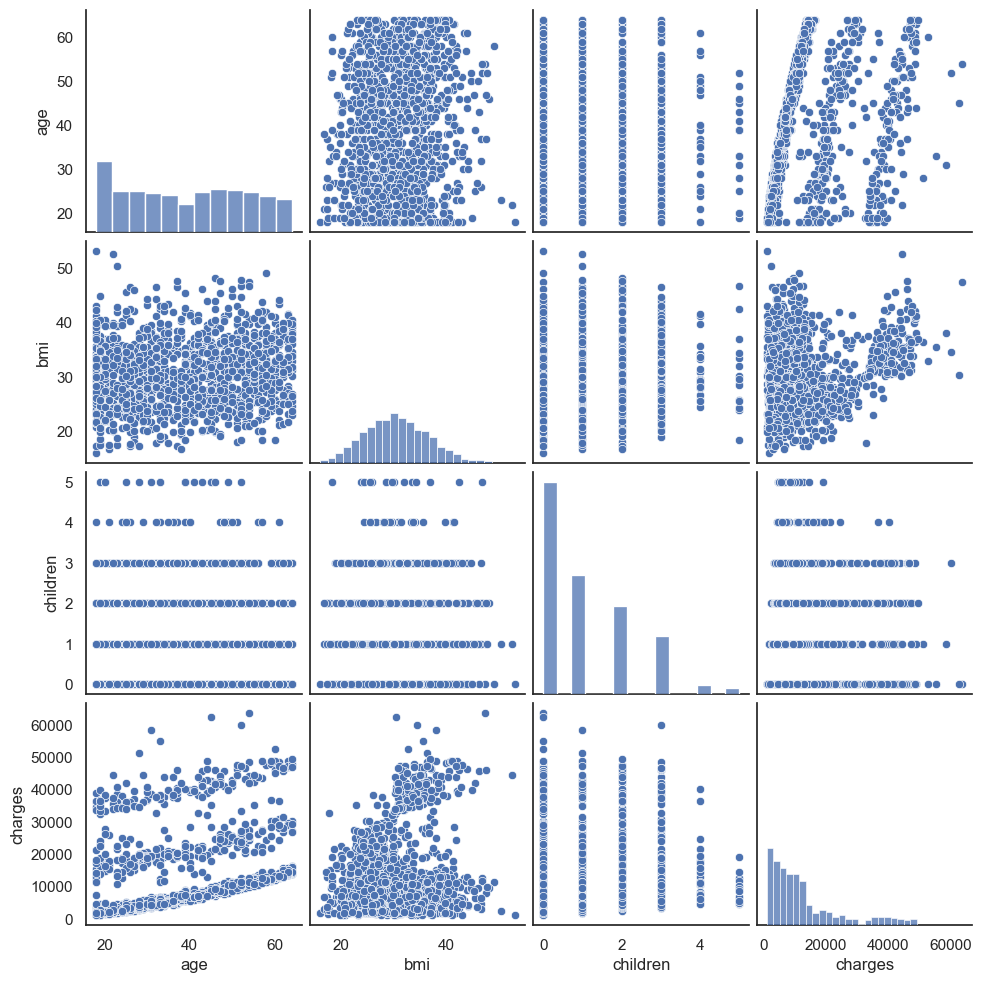

In [31]:
df.dropna(inplace = True)
sns.pairplot(df)